## **Practices** - *2° Partial*
* September 30°, 2025
#### ESCOM - IPN: *Natural Language Processing*
#### Prof. Marco Antonio

#### *B.S. in Data Science* - 6AV1
> Sánchez García Miguel Alexander

#### **1° Practice - Documents Classification**

In [2]:
import numpy as np
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Compute covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and corresponding eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components
        self.components = sorted_eigenvectors[:, :self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

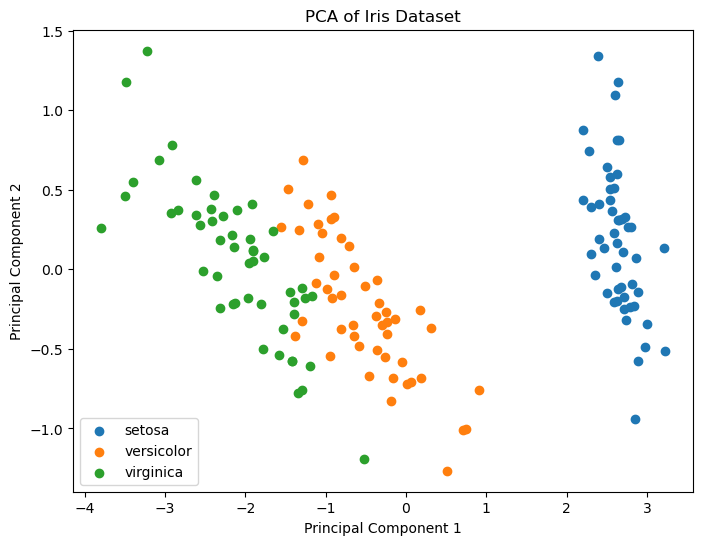

In [3]:
# Import iris dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

import matplotlib.pyplot as plt
# Visualize the results
plt.figure(figsize=(8, 6))
for class_label in np.unique(y):
    plt.scatter(X_reduced[y == class_label, 0], X_reduced[y == class_label, 1], label=data.target_names[class_label])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()